### What is Clustering?

Clustering in machine learning is a way of grouping a data into catagories where each category contains points with similar properties. This is an example of unsupervised learning because the dataset is not label.  Clustering algorithm have a number of uses such as fraud detection, medical discovery and so on. We will demonstrate one of the applications of clustering algorithms in a later post for anomaly detection.

<img src='cluster1.png'></img>

By observing the plot, we can see that our data has three groups. This groups are called clusters. So the points in cluster A have more similarities than those in B or C. The job of a clustering algorithm is to find such clusters in our data. Examples of clustering algorithm includes K-means, DBSCAN and Gaussian-Mixtures. In this blog post we will explore only the K-means algorithm.


## KMeans Algorithm
How does KMeans work? Well, for a start, KMeans will setup k-random number of points which it calls centroids. In each iteration, the algorithm will assign each point in the dataset to the nearest centroid and updates the centroids to be the mean of the points assigned to it. The algorithm then repeats the process until the centroids stop changing. Those final centroids will then be the center of the clusters. The following code demonstrates how to use the KMeans algorithm in sklearn.

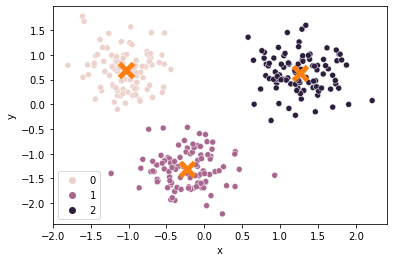

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('knn_demonstration_data.csv')
sc = StandardScaler()
x_trans = sc.fit_transform(data[['x_values', 'y_values']])
x_y_frame = pd.DataFrame(x_trans)
x_y_frame.columns = ['x', 'y']
km = KMeans(n_clusters=3)
km.fit(x_y_frame)


x_y_frame['labels'] = km.labels_
c = km.cluster_centers_
sns.scatterplot(x='x', y='y', data=x_y_frame, hue='labels')
_ = sns.scatterplot(x=c[:, 0], y=c[:, 1],  marker='x', linewidth=5, s=200)


As you can see, the KMeans algorithms successfully partitioned our data into three categories. Each of the clusters identified by a centroid, which can be visibly seen in the center of each cluster.

### How to determine K for KMeans?
One issue with KMeans is that it requires that it be told how many clusters to find. For large datasets, visualization may turnout to be hard and hence the problem of telling what is a suitable value of K. However, we can try a number of values for K and pick the smallest one that minimizes the mean squared error (MSE). To do this, we create what is called an "elbow-plot", using some dataset.

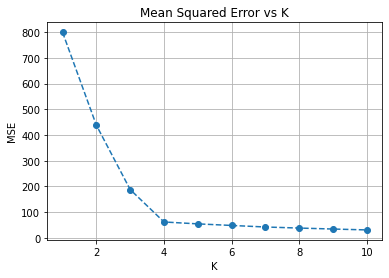

In [11]:
from matplotlib import pylab as plt
import warnings
warnings.simplefilter('ignore')

data = pd.read_csv('clustering_elbow_data.csv')
sc = StandardScaler()
x_trans = sc.fit_transform(data)
x_y_frame = pd.DataFrame(x_trans)
x_y_frame.columns = ['x', 'y']

mse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(x_y_frame)
    mse.append(km.inertia_)

plt.plot(range(1, 11), mse, 'o--')
plt.title('Mean Squared Error vs K')
plt.ylabel('MSE')
plt.xlabel('K')
plt.grid('on')


It can be observed that at k=4 the curve starts to flatted. This suggests that K=4 might just be the right value for this problem. The following visualization will make this clear. 

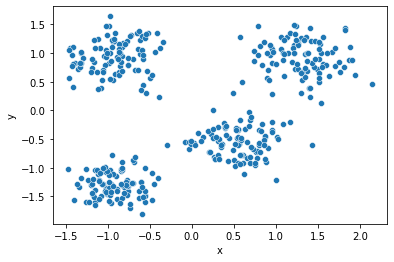

In [57]:
_= sns.scatterplot(x='x', y='y', data=x_y_frame)

Indeed, this plot confirms that we have four clearly separated clusters in this data. 

# Conclusion

In this post we have demonstrated what clustering in Machine Learning is and looked a very famous algorithm for finding clusters. This we then successfully applied to a dataset, and then successfully identified the clusters in the data.